# 🧑‍💻 Cognifyz Internship – Complete Data Analysis Report
**Intern Name:** Madhur Dhavre  
**Position:** Data Analysis Intern  
**Organization:** Cognifyz Technologies  
**Date:** May 2025

---


In [ ]:
# Step 1: Import required library
import pandas as pd

# Step 2: Load the dataset (uploaded in Files section)
df = pd.read_csv("Dataset .csv")  # Make sure file name matches

# Step 3: Display basic info
print("Columns in the dataset:")
print(df.columns)
df.head()

Columns in the dataset:
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

# 🔹 Level 1

# Task 1: Top Cuisines

#Objective:** Identify the top 3 most common cuisines and their percentage among all restaurants. **bold text**

In [ ]:
#Analyze Top 3 Cuisines
# Drop rows where 'Cuisines' is missing
df = df.dropna(subset=['Cuisines'])

# Explode cuisine combinations
cuisine_list = df['Cuisines'].str.split(', ').explode()

# Find top 3 cuisines
top_cuisines = cuisine_list.value_counts().head(3)
print("Top 3 Most Common Cuisines:\n", top_cuisines)

Top 3 Most Common Cuisines:
 Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


In [ ]:
# Total number of restaurants
total_restaurants = len(df)

# Calculate and display percentage for top 3 cuisines
print("\nPercentage of Restaurants Serving Each:")
for cuisine in top_cuisines.index:
    count = df['Cuisines'].str.contains(cuisine, na=False).sum()
    percentage = (count / total_restaurants) * 100
    print(f"{cuisine}: {percentage:.2f}%")



Percentage of Restaurants Serving Each:
North Indian: 41.50%
Chinese: 28.64%
Fast Food: 20.82%


In [ ]:
import matplotlib.pyplot as plt


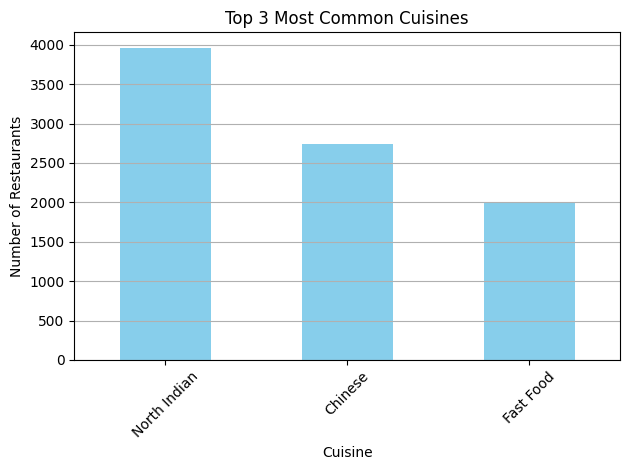

In [ ]:
# Plotting a bar chart
top_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

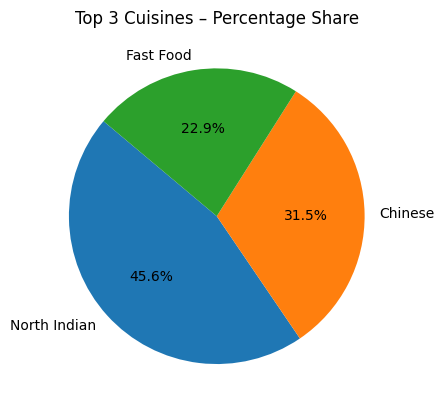

In [ ]:
# Plotting a pie chart
top_cuisines.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Cuisines – Percentage Share')
plt.ylabel('')  # Hides the y-label
plt.show()


# Task 2: City Analysis

# **Objective:** Find city with the highest number of restaurants and average ratings. **bold text** bold text

In [ ]:

# Count number of restaurants per city
city_counts = df['City'].value_counts()

# Display top city
print("City with the most restaurants:")
print(city_counts.head(1))

City with the most restaurants:
City
New Delhi    5473
Name: count, dtype: int64


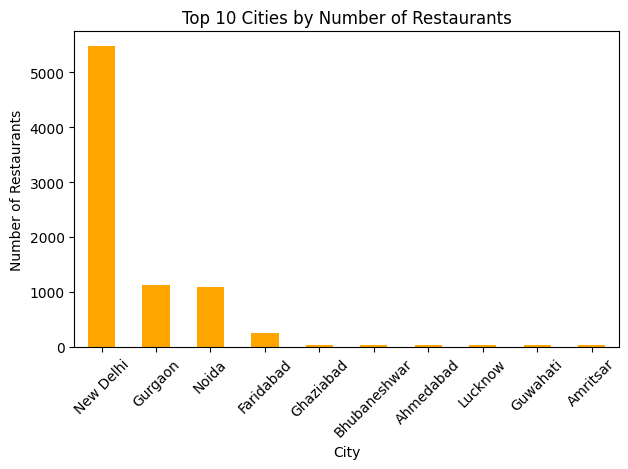

In [ ]:
# Plot top 10 cities
city_counts.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Drop rows where rating is missing
df = df.dropna(subset=['Aggregate rating'])

# Group by city and calculate average rating
avg_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Display top cities by rating
print("Cities with the highest average ratings:")
print(avg_ratings.head())


Cities with the highest average ratings:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Name: Aggregate rating, dtype: float64


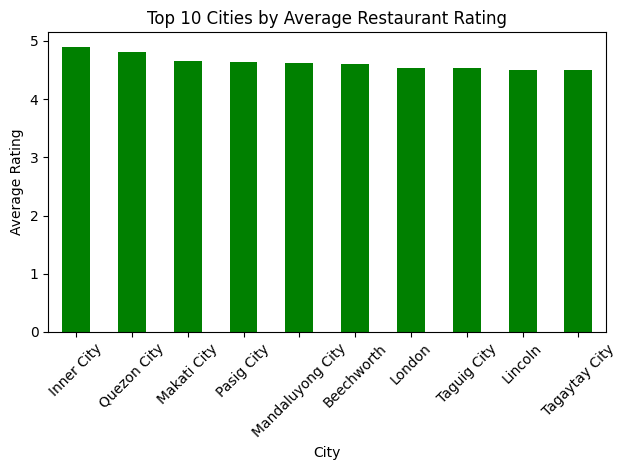

In [ ]:
# Plot top 10 average ratings
avg_ratings.head(10).plot(kind='bar', color='green')
plt.title("Top 10 Cities by Average Restaurant Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Final result
top_city = city_counts.idxmax()
top_rating_city = avg_ratings.idxmax()

print(f"✅ City with most restaurants: {top_city}")
print(f"✅ City with highest average rating: {top_rating_city}")


✅ City with most restaurants: New Delhi
✅ City with highest average rating: Inner City


# Task 3: Price Range Distribution

# **Objective:** Visualize and analyze distribution of price ranges among restaurants. **bold text**

In [ ]:

# Check price range values
df['Price range'].value_counts()

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64

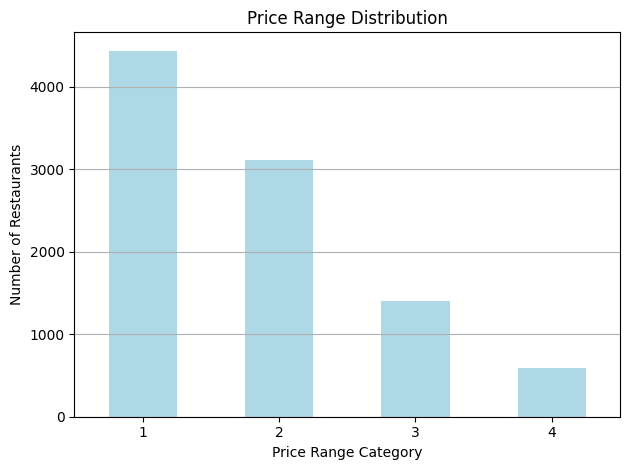

In [ ]:
# Count of each price range
price_counts = df['Price range'].value_counts().sort_index()

# Bar chart of price distribution
price_counts.plot(kind='bar', color='lightblue')
plt.title('Price Range Distribution')
plt.xlabel('Price Range Category')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
total_restaurants = len(df)
print(f"Total restaurants: {total_restaurants}")

# Calculate percentage
price_percentages = (price_counts / total_restaurants) * 100
print("\nPercentage of restaurants in each price range:")
print(price_percentages.round(2))

Total restaurants: 9542

Percentage of restaurants in each price range:
Price range
1    46.51
2    32.62
3    14.72
4     6.14
Name: count, dtype: float64


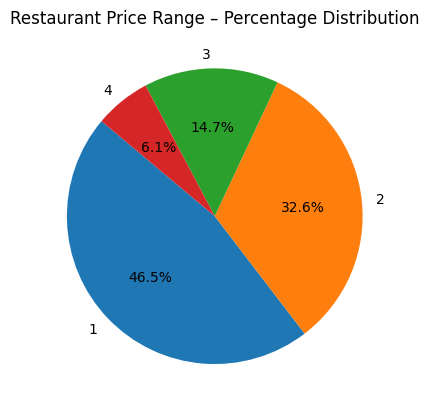

In [ ]:
price_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Restaurant Price Range – Percentage Distribution')
plt.ylabel('')
plt.show()

In [ ]:
most_common_price = price_counts.idxmax()
print(f"✅ Most common price range category: {most_common_price}")

✅ Most common price range category: 1


# Task 4: Online Delivery
# **Objective:** Calculate % of restaurants offering delivery and compare average ratings.


In [ ]:
df['Has Online delivery'].value_counts()

Has Online delivery
No     7091
Yes    2451
Name: count, dtype: int64

In [ ]:
# Total number of restaurants
total_restaurants = len(df)

# Restaurants with and without online delivery
has_delivery_yes = df[df['Has Online delivery'] == 'Yes']
has_delivery_no = df[df['Has Online delivery'] == 'No']

# Calculate percentages
yes_percent = (len(has_delivery_yes) / total_restaurants) * 100
no_percent = (len(has_delivery_no) / total_restaurants) * 100

print(f"✅ Online Delivery: {yes_percent:.2f}% of restaurants")
print(f"❌ No Online Delivery: {no_percent:.2f}% of restaurants")


✅ Online Delivery: 25.69% of restaurants
❌ No Online Delivery: 74.31% of restaurants


In [ ]:
# Drop missing ratings
df = df.dropna(subset=['Aggregate rating'])

# Average rating with online delivery
avg_rating_yes = has_delivery_yes['Aggregate rating'].mean()

# Average rating without online delivery
avg_rating_no = has_delivery_no['Aggregate rating'].mean()

print(f"⭐ Average Rating (Online Delivery): {avg_rating_yes:.2f}")
print(f"⭐ Average Rating (No Online Delivery): {avg_rating_no:.2f}")


⭐ Average Rating (Online Delivery): 3.25
⭐ Average Rating (No Online Delivery): 2.46


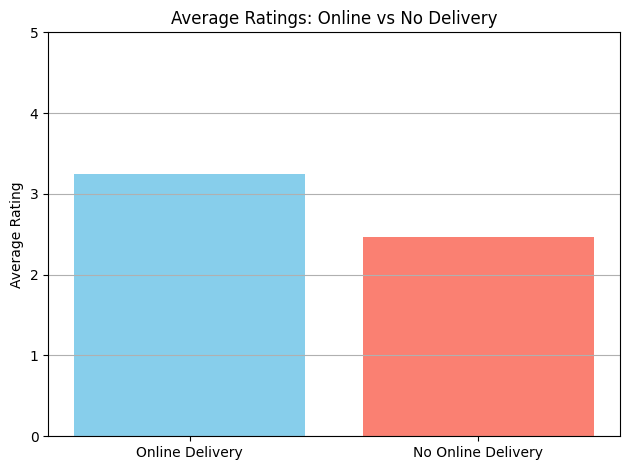

In [ ]:
import matplotlib.pyplot as plt  # 👈 Ensure this is included if not already

# Bar chart comparing average ratings
ratings = [avg_rating_yes, avg_rating_no]
labels = ['Online Delivery', 'No Online Delivery']

plt.bar(labels, ratings, color=['skyblue', 'salmon'])
plt.title('Average Ratings: Online vs No Delivery')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
print(" Final Summary:")
print(f" Restaurants with Online Delivery: {yes_percent:.2f}%")
print(f" Restaurants without Online Delivery: {no_percent:.2f}%")
print(f" Avg Rating (Online Delivery): {avg_rating_yes:.2f}")
print(f" Avg Rating (No Delivery): {avg_rating_no:.2f}")


 Final Summary:
 Restaurants with Online Delivery: 25.69%
 Restaurants without Online Delivery: 74.31%
 Avg Rating (Online Delivery): 3.25
 Avg Rating (No Delivery): 2.46


# **🔹 Level 3 – Task 2: Votes Analysis**

# **Objective:** Analyze correlation between votes and rating; find highest and lowest voted restaurants.


In [ ]:
# Check if column exists
print(df.columns)

# Check for missing values
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df = df.dropna(subset=['Votes', 'Aggregate rating'])

# Convert to int (if needed)
df['Votes'] = df['Votes'].astype(int)

# Display top 5 highest and lowest vote counts
top_votes = df.sort_values(by='Votes', ascending=False).head(5)
low_votes = df.sort_values(by='Votes', ascending=True).head(5)

print("🔥 Top 5 Most Voted Restaurants:")
print(top_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])

print("\n🧊 Lowest 5 Voted Restaurants:")
print(low_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
🔥 Top 5 Most Voted Restaurants:
                Restaurant Name  Votes  Aggregate rating
728                        Toit  10934               4.8
735                    Truffles   9667               4.7
3994           Hauz Khas Social   7931               4.3
2412                  Peter Cat   7574               4.3
739   AB's - Absolute Barbecues   6907               4.6

🧊 Lowest 5 Voted Restaurants:
           Restaurant Name  Votes  Aggregate rating
1180       Lavi Foji Dhaba      0               0.0
1178  Gopi Sweets & Caters      0               0.0
1173             Aha Bites      0 

In [ ]:

# Correlation value
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"\n📈 Correlation between Votes and Ratings: {correlation:.2f}")



📈 Correlation between Votes and Ratings: 0.31


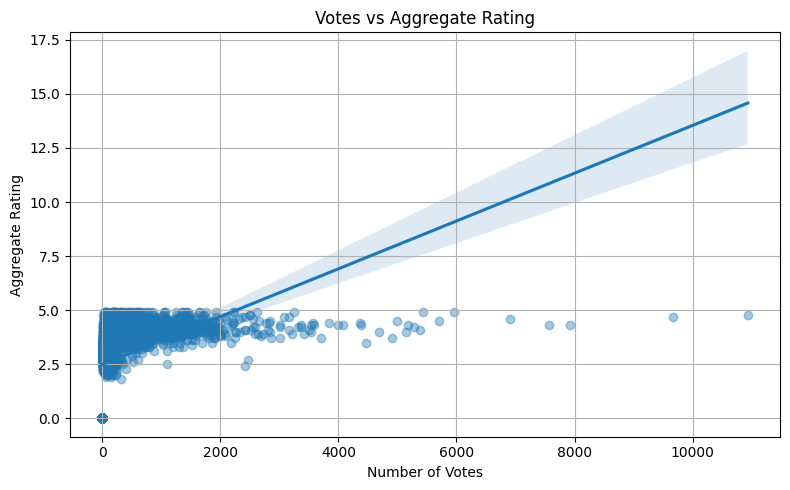

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn with alias 'sns'

plt.figure(figsize=(8, 5))
sns.regplot(x='Votes', y='Aggregate rating', data=df, scatter_kws={'alpha': 0.4})
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print("✅ Task 2 Complete:")
print("Top 5 restaurants by votes and bottom 5 identified.")
print(f"Correlation value shows a {'strong' if abs(correlation) > 0.6 else 'weak' if abs(correlation) < 0.3 else 'moderate'} relationship between votes and rating.")


✅ Task 2 Complete:
Top 5 restaurants by votes and bottom 5 identified.
Correlation value shows a moderate relationship between votes and rating.


# Task 3: Price Range vs. Online Delivery and Table Booking

# **Objective:** Explore service availability based on pricing category.


In [ ]:
# View all column names
print(df.columns)

# Ensure necessary columns exist
cols = ['Price range', 'Has Online delivery', 'Has Table booking']
for col in cols:
    print(f"\nUnique values in '{col}':\n", df[col].unique())


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Unique values in 'Price range':
 [3 4 2 1]

Unique values in 'Has Online delivery':
 ['No' 'Yes']

Unique values in 'Has Table booking':
 ['Yes' 'No']


In [ ]:
# Filter out rows with missing values
df = df.dropna(subset=cols)

# Convert Yes/No to 1/0 for analysis
df['OnlineDeliveryFlag'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['TableBookingFlag'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

# Convert price to int (if needed)
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')


In [ ]:
# Group by price range
grouped = df.groupby('Price range')[['OnlineDeliveryFlag', 'TableBookingFlag']].mean()

# Multiply by 100 to convert to %
grouped_percent = grouped * 100

print("📊 Service Availability by Price Range (in %):\n")
print(grouped_percent.round(2))

📊 Service Availability by Price Range (in %):

             OnlineDeliveryFlag  TableBookingFlag
Price range                                      
1                         15.80              0.02
2                         41.31              7.68
3                         29.25             45.84
4                          9.04             46.76


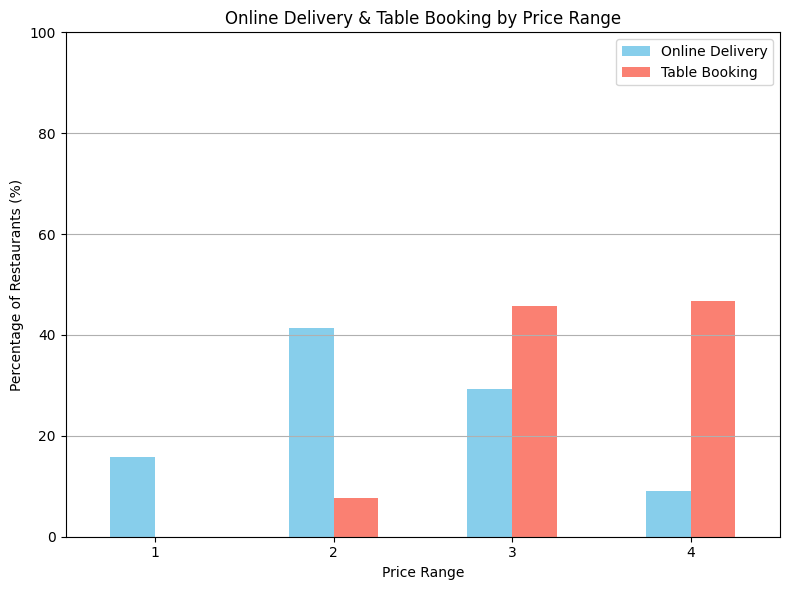

In [ ]:
# Bar plot
grouped_percent.plot(kind='bar', figsize=(8,6), color=['skyblue', 'salmon'])
plt.title('Online Delivery & Table Booking by Price Range')
plt.ylabel('Percentage of Restaurants (%)')
plt.xlabel('Price Range')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.legend(['Online Delivery', 'Table Booking'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Find if higher-priced restaurants are more likely to offer services
print("\n🎯 Summary:")
high_price = grouped_percent.idxmax()

print(f"✅ Price Range with MOST Online Delivery: {high_price['OnlineDeliveryFlag']}")
print(f"✅ Price Range with MOST Table Booking: {high_price['TableBookingFlag']}")


🎯 Summary:
✅ Price Range with MOST Online Delivery: 2
✅ Price Range with MOST Table Booking: 4


## ✅ Final Summary

- ✅ Completed all 4 tasks from Level 1
- ✅ Completed 2 tasks from Level 3 (for stipend eligibility)
- 🧠 Skills Used: Python, pandas, seaborn, matplotlib, data cleaning, visualization, correlation analysis
- 🛠️ Tools Used: Google Colab, CSV datasets

Thank you, Cognifyz Technologies, for this amazing opportunity!